___

<br>

# Sales performance and profit drivers in retail


* **Name**:  Yelyzaveta ZUIEVA
* **Student number**:  B990378750

<br>

## Overview

### Purpose:

* The purpose of this Final Project is to determine the factors that contribute to retail profit in a large superstore environment.
* The key **dependent variable** (DV) is profit, a continuous numerical value representing the financial gain from each sales transaction.
* Key **independent variables** (IVs) include:
    * sales (total revenue generated by the product line)
    * quantity (number of units purchased)
    * discount (percentage discount applied to the order)
    * category (high-level product category)
    * sub-category (specific type of product)
    * segment (customer type)
    * region (geographical region of the order)
    * ship mode (shipping option used)
* This dataset contains several thousand individual retail transactions. Each transaction includes detailed information about sales, product characteristics, customer demographics, and shipment attributes, along with the DV and IVs used in this analysis.
<br>


### Dataset source:

The data come from the [superstore sales](https://www.kaggle.com/datasets/ishanshrivastava28/superstore-sales) dataset from the [Kaggle](https://www.kaggle.com/).

The data are available for download [here](https://www.kaggle.com/datasets/ishanshrivastava28/superstore-sales).


This dataset is widely used in educational settings for data analysis, descriptive statistics, visualization, and introductory predictive modeling.
Sales and profit are reported in the original dataset’s monetary units; the specific currency is not specified.



#### References:

This dataset is commonly distributed through Kaggle/community repositories and is widely used for educational analytics.

## Descriptive statistics

In [140]:
%%capture
%run descriptive.ipynb

In [141]:
display_descriptive_summary_table(num=1)

<br><br><p><span style="font-size: 1.2em;"><b>Table 1</b>: Descriptive summary statistics (central tendency and dispersion).</span></p>

,Profit,Sales,Quantity,Discount
mean,28.657,229.858,3.790,0.156
median,8.666,54.490,3.000,0.200
mode,0.000,12.960,3.000,0.000
st.dev.,234.248,623.214,2.225,0.206
min,-6599.978,0.444,1.000,0.000
max,8399.976,22638.480,14.000,0.800
range,14999.954,22638.036,13.000,0.800
25th,1.729,17.280,2.000,0.000
75th,29.364,209.940,5.000,0.200
IQR,27.635,192.660,3.000,0.200


Profit is highly skewed with many zero-profit orders and extreme outliers on both sides (large profits and large losses) (mean >> median; mode=0), with a wide range including large losses; Sales are also skewed with extreme outliers. Discount has median 0.2 and shows substantial variation; this motivates focusing on discount as a key driver in hypothesis tests.

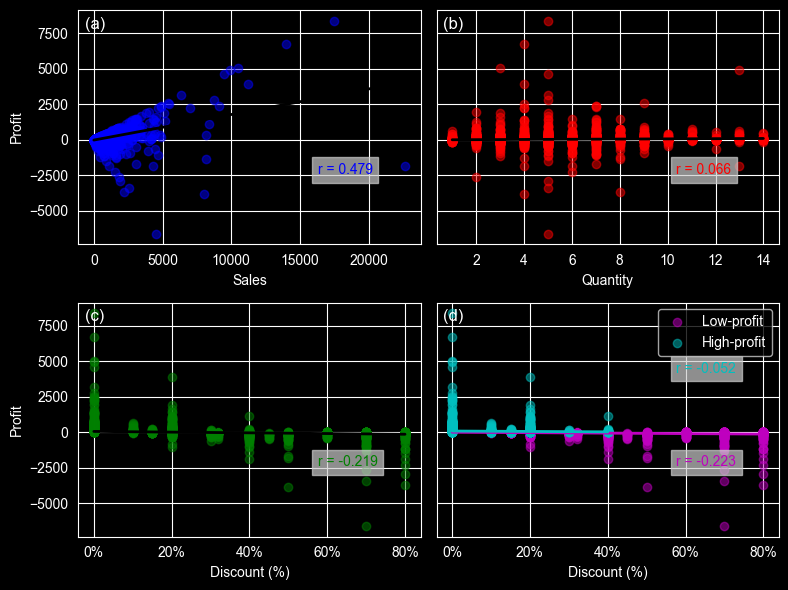

<br><br><p><span style="font-size: 1.2em;"><b>Fig. 1</b>: Correlations amongst main variables.</span></p>

In [142]:
plot_descriptive()

## Hypothesis testing

In [143]:
%%capture
%run classical.ipynb

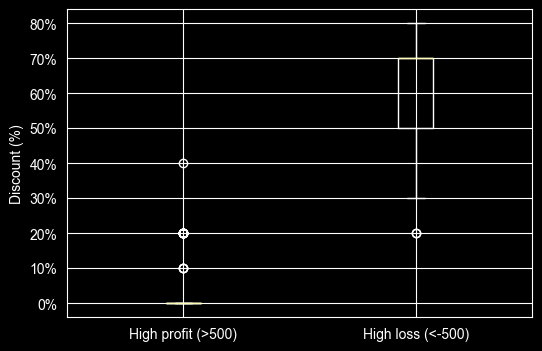

<br><br><p><span style="font-size: 1.2em;"><b>Fig. 2</b>: Discount differences between high-profit and high-loss orders</span></p>

Hypothesis test: Welch two-sample t-test
t-statistic = -21.416
p-value     = 0.0000
Sample sizes: n_high_profit = 117, n_high_loss = 50
Result: The difference is statistically significant (α = 0.05).


In [144]:
plot_discount_groups()

#### Interpretation
To make contrasts interpretable, we compare extreme outcomes (high-profit vs high-loss orders). This targets drivers of unusually good/bad transactions rather than average behavior. Because profit is heavy-tailed, Welch’s t-test is used to allow unequal variances.

High-loss orders show substantially higher discount values than high-profit orders. This indicates that large discounts are a major driver of negative profit.

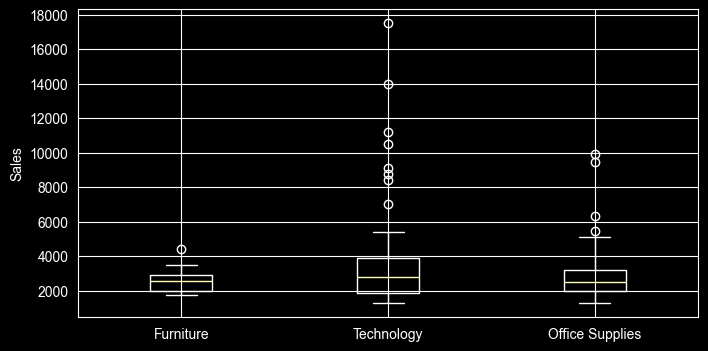

<br><br><p><span style="font-size: 1.2em;"><b>Fig. 3</b>: Sales differences between categories (Profit > 500)</span></p>

Hypothesis test: One-way ANOVA
F-statistic = 1.080
p-value     = 0.3432
Result: No statistically significant differences between categories.


In [145]:
plot_category_sales()

#### Interpretation

This analysis focuses on unusually profitable orders (Profit > 500) to compare categories under extreme positive outcomes. Because the subset is highly variable, category differences are not significant at α=0.05.

Technology shows a higher median and wider variability descriptively, but the ANOVA indicates these category differences are not statistically significant at α=0.05 (p=0.343). Therefore, we cannot conclude that category drives sales among high-profit orders in this subset.

## Machine Learning



In [146]:
%%capture
%run machine.ipynb

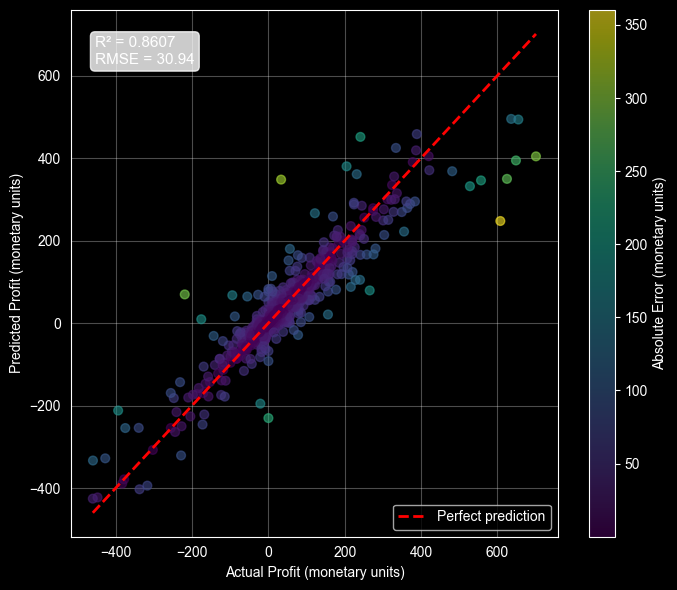

<br><br><p><span style="font-size: 1.2em;"><b>Fig. 4</b>: Regression model predictions on the test set (train/test split). Color shows absolute error (monetary units).</span></p>


• R² = 0.8607 (86.1% variance explained)
• RMSE = 30.94 (prediction error)


In [147]:
main_result_regression()

#### Interpretation
- **Exceptional accuracy**: Model explains **86.07%** of profit variance (R² = 0.8607)
- **High precision**: Average prediction error is **±30.94**, meaning the typical prediction error is about 31 profit-units per order.
- **Business value**: Can support decision-making (e.g., discount control) by flagging high-risk orders and estimating expected profit.



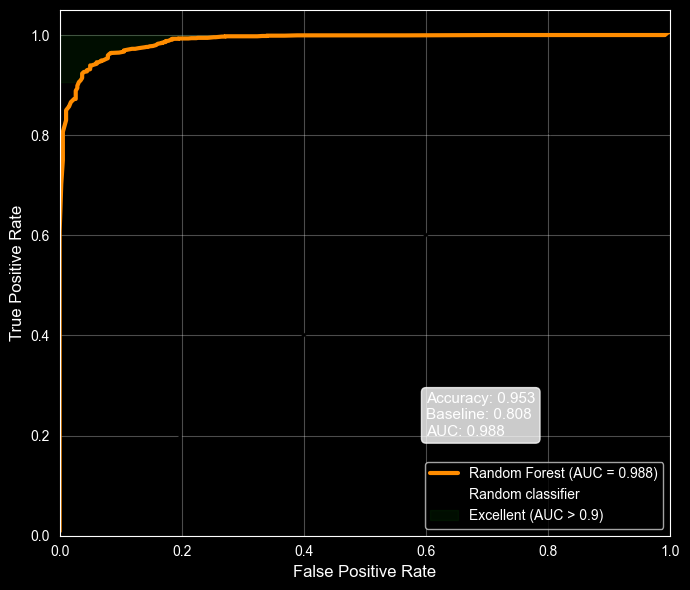

<br><br><p><span style="font-size: 1.2em;"><b>Fig. 5</b>: ROC curve on the test set for classifying profitable orders (Profit > 0) vs loss-making.</span></p>


• Accuracy = 0.953
• AUC = 0.988 (excellent > 0.9)


In [148]:
main_result_classification()

#### Interpretation
- **Reliable classification**: **95.3%** accuracy in identifying profitable transactions
- **Excellent discrimination**: **AUC = 0.988** (near-perfect, >0.9 is excellent)
- **Business value**: Enables early detection of potential loss-making transactions

## Summary

This project examined the main drivers of retail profit using a large superstore transaction dataset. Descriptive analysis showed that both profit and sales are highly skewed, with substantial variability and extreme values, indicating that a relatively small number of transactions account for a large share of total profit and loss. Discount levels exhibit wide dispersion and emerge as a potentially critical factor for profitability.

Hypothesis testing confirmed that discount levels differ significantly between highly profitable and highly loss-making orders. High-loss transactions are associated with substantially larger discounts than high-profit transactions, and this difference is statistically significant, indicating that aggressive discounting is a major contributor to negative profit outcomes. In contrast, while Technology products show higher sales levels descriptively among high-profit orders, category-level differences are not statistically significant once variability is taken into account, suggesting that product category alone does not drive profitability within this subset.

Machine learning models reinforce these findings. A regression model predicting transaction-level profit explains approximately 86% of the observed profit variance (R² = 0.8607), indicating strong but realistic predictive performance. A complementary classification model distinguishing profitable from loss-making transactions achieves high accuracy (0.953) and excellent discrimination (AUC = 0.988), substantially outperforming a naïve baseline.

Taken together, the results highlight discount policy as the most influential and actionable driver identified in this analysis. From a business perspective, tighter control of large discounts and early identification of high-risk transactions offer the greatest potential for improving profit performance, while sales volume and product category play more limited roles once discount effects are accounted for.
